#### PHYS5116 Network Science I, Final Project - Mostafa Alkady <br>
## Music Artists and Collaborations

In [138]:
import numpy as np
import pandas as pd
import networkx as nx
from ast import literal_eval
import matplotlib.pyplot as plt

### Loading the data:

In [919]:
# Load the CSV file
nodes_df = pd.read_csv('data/nodes.csv')
print(f"number of data points: {len(nodes_df)}")

number of data points: 156422


In [920]:
# DELETE THE ARTISTS WITH chart_hits, name = NaN
nodes_df_filtered = nodes_df.dropna(subset=['chart_hits'])
nodes_df_filtered = nodes_df_filtered.dropna(subset=['name'])
print(f"Number of data points now is: {len(nodes_df_filtered)}")

Number of data points now is: 19640


2- Music Collaborations network

In [921]:
# Load the CSV file for the music collaborations network
edges_df = pd.read_csv('data/edges.csv')

# drop the rows of nodes_df that are not in edges_df (i.e. the artists that do not have any collaborations)
# nodes_df = nodes_df[nodes_df['spotify_id'].isin(edges_df['id_0']) | nodes_df['spotify_id'].isin(edges_df['id_1'])]

G = nx.Graph()
for index, row in edges_df.iterrows():
    # add edge only if chart_hits in nodes_df is not NaN (nodes_df has already been filtered)
    if row['id_0'] in nodes_df['spotify_id'].values and row['id_1'] in nodes_df['spotify_id'].values:
        G.add_edge(row['id_0'], row['id_1'])

# replace the node IDs with the artist names
id_to_artist = dict(zip(nodes_df['spotify_id'], nodes_df['name']))
nx.relabel_nodes(G, id_to_artist, copy=False)

print(f'Collaborations network: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges')

KeyboardInterrupt: 

In [ ]:
# largest connected component
G_lcc = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(G_lcc)

In [386]:
# remove rows from nodes_df that are not in G_collaborations
nodes_df = nodes_df[nodes_df['name'].isin(G.nodes)]
print(f"Number of data points now is: {len(nodes_df)}")

13963

### Network Visualization:

In [5]:
def k_core_decomposition(G, k):
    ''' A function that performs the k-core decomposition of a graph.

    Parameters
    ----------
    G (nx.Graph): The input graph.
    k (int): The k-core to be computed.

    Returns
    -------
    G (nx.Graph): The k-core graph.
    '''
    G = G.copy()
    h = 0 # degrees to be removed
    core = {}
    while G:
        nodes = [node for node, degree in G.degree() if degree <= h]
        G.remove_nodes_from(nodes)
        core[h] = nodes
        if h == k:
            break
        h += 1
    return G

def get_top_k_hubs(G, nodes, k=5):
    ''' a function that returns the top k-hubs in a bipartite graph.
    '''
    # Sort nodes by their degree in descending order and return the top k
    sorted_hubs = sorted(nodes, key=lambda node: G.degree(node), reverse=True)
    return [(hub, G.degree(hub)) for hub in sorted_hubs[:k]]

Visualizing the bi-partite network:

In [6]:
color = ['lightblue' if n[1]['bipartite'] == 0 else 'purple' for n in B.nodes(data=True)]
top_5_artists = get_top_k_hubs(B, artists, k=5)
top_5_genres = get_top_k_hubs(B, genres, k=5)
print(f'Top {len(top_5_artists)} versatile artists (top {len(top_5_genres)} hubs): {top_5_artists}')
print(f'Top {len(top_5_genres)} famous genres (top {len(top_5_genres)} hubs): {top_5_genres}')

Top 5 versatile artists (top 5 hubs): [('Kathleen Edwards', 16), ('Neko Case', 16), ('Peter Frampton', 15), ('Faces', 15), ('Taj Mahal', 15)]
Top 5 famous genres (top 5 hubs): [('pop', 544), ('electro house', 512), ('dance pop', 505), ('edm', 452), ('rap', 448)]


Size of the subgraph:  2548


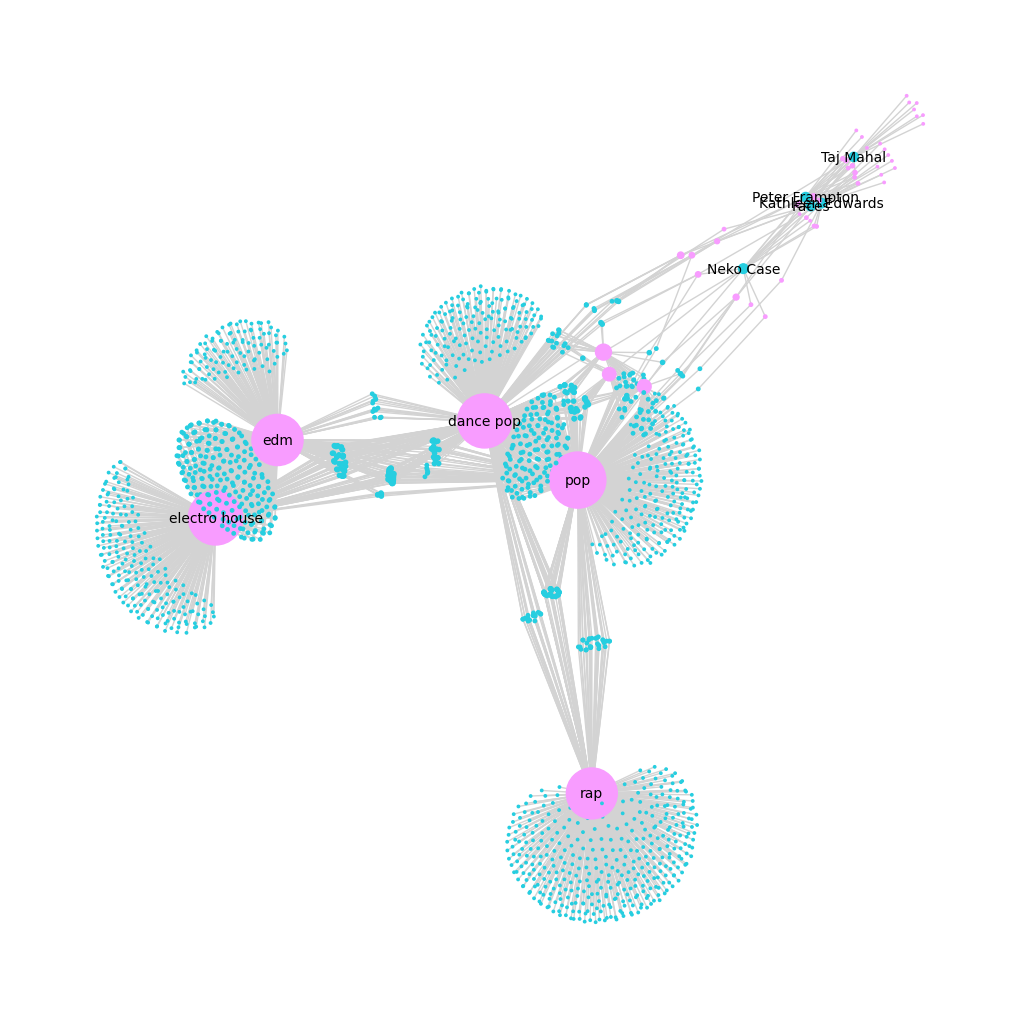

In [7]:
num_of_hubs_per_type = 5

# Create a subgraph of the bipartite graph with the top 5 artists and genres and their neighbors
top_nodes = [node for node, _ in get_top_k_hubs(B, artists, num_of_hubs_per_type) + get_top_k_hubs(B, genres, num_of_hubs_per_type)]
bipartite_labels = {node: node for node in top_nodes}

subgraph_nodes = top_nodes.copy()
for node in top_nodes:
    subgraph_nodes.extend(list(B.neighbors(node)))

print("Size of the subgraph: ", len(subgraph_nodes))

B_subgraph = B.subgraph(subgraph_nodes)
subgraph_degree_dict = dict(B_subgraph.degree())
colors = ['#26cee0' if n[1]['bipartite'] == 0 else '#f89cff' for n in B_subgraph.nodes(data=True)]

# Create a layout for the nodes
pos = nx.spring_layout(B_subgraph, seed = 50)

# Draw the nodes and edges
plt.figure(figsize=(10, 10))
nx.draw(B_subgraph, pos, node_color=colors, with_labels=False, node_size=[3*v for v in subgraph_degree_dict.values()], font_size=10, edge_color='lightgray')
nx.draw_networkx_labels(B_subgraph, pos, labels=bipartite_labels, font_size=10, font_color='black')
plt.savefig(f'plots/artist_genre_bipartite_graph_top_{num_of_hubs_per_type}.pdf')
plt.savefig(f'plots/artist_genre_bipartite_graph_top_{num_of_hubs_per_type}.png')
# plt.title(f"Top {num_of_hubs_per_type} versatile artists and top {num_of_hubs_per_type} famous genres in the artist-genre bipartite graph")
# plt.legend(['Artists', 'Genres'])

The sixth genre hub:

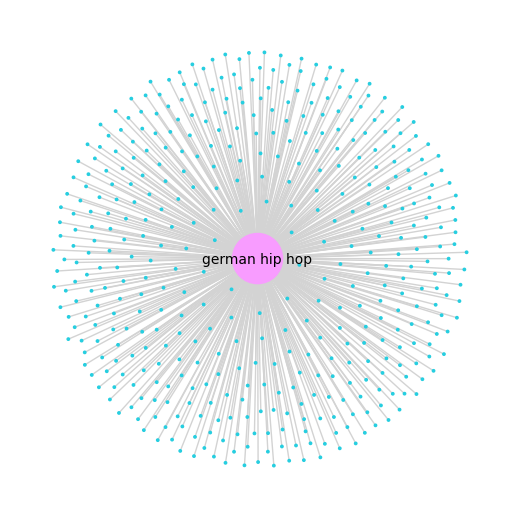

In [8]:
sixth_hub = ['german hip hop']
sixth_subgraph_nodes = sixth_hub.copy()

for node in sixth_hub:
    sixth_subgraph_nodes.extend(list(B.neighbors(node)))

B_sixth_subgraph = B.subgraph(sixth_subgraph_nodes)
sixth_subgraph_degree_dict = dict(B_sixth_subgraph.degree())
colors = ['#26cee0' if n[1]['bipartite'] == 0 else '#f89cff' for n in B_sixth_subgraph.nodes(data=True)]
label = {node: node for node in sixth_hub}

# Create a layout for the nodes
pos = nx.spring_layout(B_sixth_subgraph, seed = 50)

# Draw the nodes and edges
plt.figure(figsize=(5, 5))
nx.draw(B_sixth_subgraph, pos, node_color=colors, with_labels=False, node_size=[3*v for v in sixth_subgraph_degree_dict.values()], font_size=10, edge_color='lightgray')
nx.draw_networkx_labels(B_sixth_subgraph, pos, labels=label, font_size=10, font_color='black')
plt.savefig(f'plots/german_hip_hop.png')

Visualizing the collaboration network:

In [9]:
# print(top_5_collaborators)
G_collaborations.remove_node('Johann Sebastian Bach')
G_collaborations.remove_node('Traditional')
G_collaborations.remove_node('Jean Sibelius')

# remove the isolated nodes
G_collaborations.remove_nodes_from(list(nx.isolates(G_collaborations)))

Top 5 collaborators: ['Mc Gw', 'MC MN', 'Gucci Mane', 'Armin van Buuren', 'Snoop Dogg']
Size of the subgraph:  2949


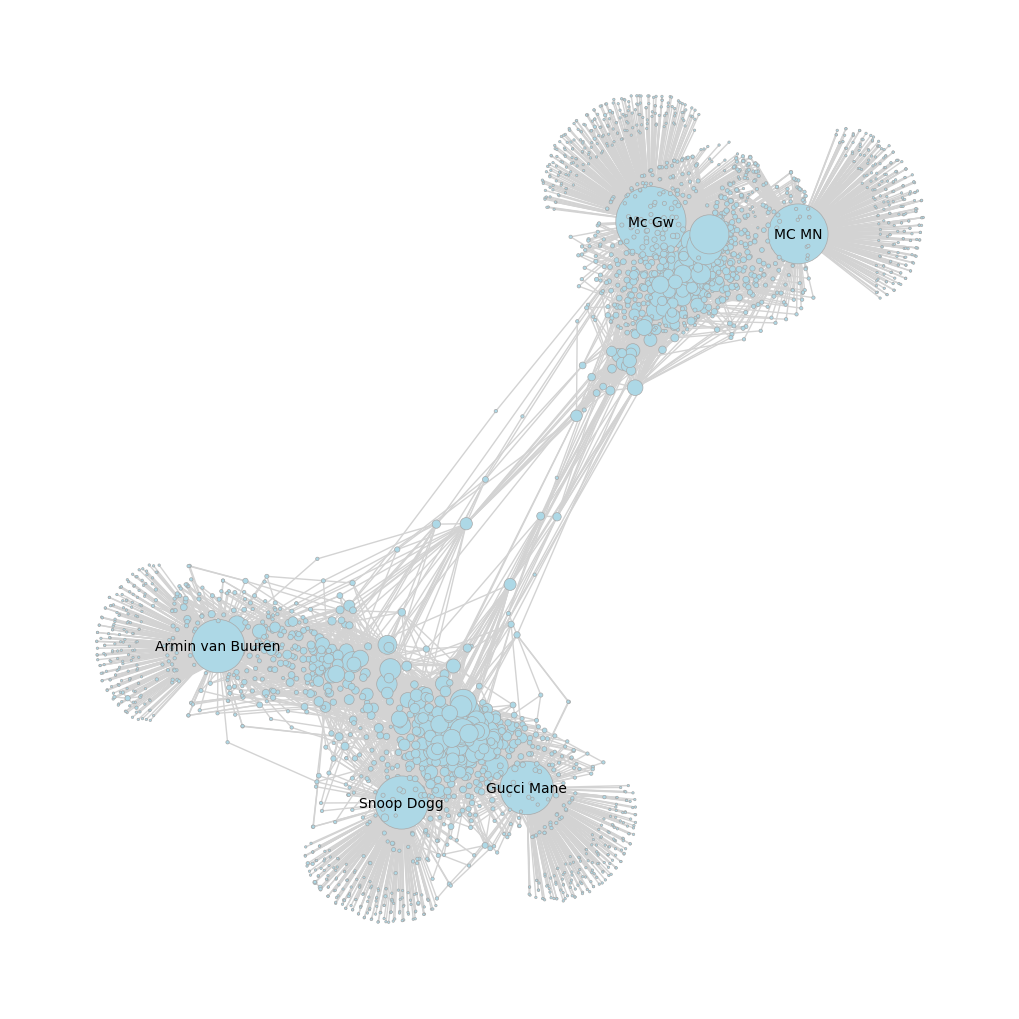

In [10]:
# get hubs of the collaboration network
num_of_hubs = 5
top_5_collaborators = [node for node, _ in get_top_k_hubs(G_collaborations, G_collaborations.nodes(), k=num_of_hubs)]
labels = {node: node for node in top_5_collaborators}
print(f'Top {num_of_hubs} collaborators: {top_5_collaborators}')

# plot the hubs and their neighbors
subgraph_nodes = [node for node in top_5_collaborators]
for node in top_5_collaborators:
    subgraph_nodes.extend(list(G_collaborations.neighbors(node)))

print("Size of the subgraph: ", len(subgraph_nodes))

G_collaborations_subgraph = G_collaborations.subgraph(subgraph_nodes)
subgraph_degree_dict = dict(G_collaborations_subgraph.degree())

# Create a layout for the nodes
pos = nx.spring_layout(G_collaborations_subgraph, seed=2, iterations = 50)

# Draw the nodes and edges
plt.figure(figsize=(10, 10))
nx.draw(
    G_collaborations_subgraph, pos, 
    node_color='lightblue', 
    with_labels=False, 
    node_size=[3*v for v in subgraph_degree_dict.values()], 
    font_size=10, 
    edge_color='lightgray', 
    edgecolors='darkgray', 
    linewidths=0.5)
nx.draw_networkx_labels(G_collaborations_subgraph, pos, labels=labels, font_size=10, font_color='black')
plt.savefig(f"plots/collaborations_network.pdf")
plt.savefig(f"plots/collaborations_network.png")

Is this subgraph connected?

In [11]:
print("Subgraph is connected:", nx.is_connected(G_collaborations_subgraph))
print(nx.number_connected_components(G_collaborations))

Subgraph is connected: True
1140


The largest connected component:

In [13]:
# get the largest connected component
largest_connected_component = max(nx.connected_components(G_collaborations), key=len)
G_collaborations_lcc = G_collaborations.subgraph(largest_connected_component)
print(f'Largest connected component: {G_collaborations_lcc.number_of_nodes()} nodes, {G_collaborations_lcc.number_of_edges()} edges')

# print("Average shortest path length:", nx.average_shortest_path_length(G_collaborations_lcc))
# print("Diameter:", nx.diameter(G_collaborations_lcc))

Largest connected component: 135807 nodes, 289663 edges


In [ ]:
def degree_distribution(G, number_of_bins=15, log_binning=True, density=True, directed=False):
    """
    Given a degree sequence, return the y values (probability) and the
    x values (support) of a degree distribution that you're going to plot.
    
    Parameters
    ----------
    G (nx.Graph):
        the network whose degree distribution to calculate

    number_of_bins (int):
        length of output vectors
    
    log_binning (bool):
        if you are plotting on a log-log axis, then this is useful
    
    density (bool):
        whether to return counts or probability density (default: True)
        Note: probability densities integrate to 1 but do not sum to 1. 

    directed (bool or str):
        if False, this assumes the network is undirected. Otherwise, the
        function requires an 'in' or 'out' as input, which will create the 
        in- or out-degree distributions, respectively.
        
    Returns
    -------
    bins_out, probs (np.ndarray):
        probability density if density=True node counts if density=False; binned edges
    
    """

    if directed:
        if directed=='in':
            k = list(dict(G.in_degree()).values()) # get the in degree of each node
        elif directed=='out':
            k = list(dict(G.out_degree()).values()) # get the out degree of each node
        else:
            out_error = "Help! if directed!=False, the input needs to be either 'in' or 'out'"
            print(out_error)
            return out_error
    else:
        k = list(dict(G.degree()).values()) # get the degree of each node


    kmax = np.max(k)    # get the maximum degree
    kmin = 0            # let's assume kmin must be 0

    if log_binning:
        bins = np.logspace(0, np.log10(kmax+1), number_of_bins+1)
    else:
        bins = np.linspace(0, kmax+1, num=number_of_bins+1)
    probs, _ = np.histogram(k, bins, density=density)
    bins_out = bins[1:] - np.diff(bins)/2.0
    
    return bins_out, probs

# plot the degree distribution of the collaborations network
bins, probs = degree_distribution(G_collaborations, number_of_bins=15, log_binning=True, density=True, directed=False)
plt.figure(figsize=(10, 6))
plt.loglog(bins, probs, 'o', color='darkblue')
plt.xlabel('$k$')
plt.ylabel('$P(k)$')
plt.title('Degree distribution of the collaborations network')
plt.grid(True)
plt.savefig('plots/degree_distribution_collaborations.png')

In [34]:
nx.degree_assortativity_coefficient(G_collaborations)

-0.094561768946889

In [38]:
import powerlaw

def power_law_fit(G):
    ''' a function to fit a power law to the degree distribution of a graph
    
    Parameters
    ----------
    G (networkx.Graph): a graph
        
    Returns
    -------
    fit (powerlaw.Fit): a powerlaw fit object
    '''
    
    k = list(dict(G.degree()).values())
    fit = powerlaw.Fit(k)
    return fit

fit = power_law_fit(artist_projection)
fit.alpha

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


3.2003238335511024

Exploring Paths:

In [29]:
source = 'Snoop Dogg'
target = 'Armen van Buuren'
paths = list(nx.all_simple_paths(G_collaborations_subgraph, source=source, target=target))

KeyboardInterrupt: 

Failed attempt: K core decomposition

In [ ]:
# number_of_peelings = 32

# G_collaborations_peeled = k_core_decomposition(G_collaborations, number_of_peelings)
# print(f'Collaborations network: {G_collaborations_peeled.number_of_nodes()} nodes, {G_collaborations_peeled.number_of_edges()} edges')

# d = dict(G_collaborations_peeled.degree)
# pos = nx.spring_layout(G_collaborations_peeled)

# nx.draw(G_collaborations_peeled, pos, node_color='purple', edge_color='lightgray', node_size = [1.5*v for v in d.values()])

### Collaboration Correlation with Geographic Proximity:

Adding the country column to the dataframe:

In [788]:
# Function to extract the letters with the highest number
def extract_highest_country(hits):
    # Parse the list into tuples of (letters, number)
    parsed_hits = [(item.split(' ')[0], int(item.split('(')[-1][:-1])) for item in hits]
    top_country = max(parsed_hits, key=lambda x: x[1])[0] # the tuple with the maximum number
    return top_country

# Ensure that the 'chart_hits' column is a list of strings (if not done, lists will be read as strings)
nodes_df_filtered['chart_hits'] = nodes_df_filtered['chart_hits'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Create a new column with the highest charting country
nodes_df_filtered['country'] = nodes_df_filtered['chart_hits'].apply(extract_highest_country)

# Replace the country codes with the full country names
import pycountry
country_dict = {country.alpha_2.lower(): country.name for country in pycountry.countries}
nodes_df_filtered['country'] = nodes_df_filtered['country'].map(country_dict)

# FIX COUNTRIES NAME IN THE DATAFRAME AND DICTIONARY
def fix_country_name_df(df):
    df['country'] = df['country'].replace('United States of America', 'United States')
    df['country'] = df['country'].replace('Hong Kong S.A.R.', 'Hong Kong')
    df['country'] = df['country'].replace('Czechia', 'Czech Republic')
    df['country'] = df['country'].replace('Korea, Republic of', 'South Korea')
    df['country'] = df['country'].replace('Iran, Islamic Republic of', 'Iran')
    df['country'] = df['country'].replace('Russian Federation', 'Russia')
    df['country'] = df['country'].replace('Viet Nam', 'Vietnam')
    df['country'] = df['country'].replace('Venezuela, Bolivarian Republic of', 'Venezuela')
    df['country'] = df['country'].replace('Moldova, Republic of', 'Moldova')
    df['country'] = df['country'].replace('Syrian Arab Republic', 'Syria')
    df['country'] = df['country'].replace('Lao People\'s Democratic Republic', 'Laos')
    df['country'] = df['country'].replace('Côte d\'Ivoire', 'Ivory Coast')
    df['country'] = df['country'].replace('Congo, The Democratic Republic of the', 'Congo')
    df['country'] = df['country'].replace('Bolivia, Plurinational State of', 'Bolivia')
    df['country'] = df['country'].replace('Taiwan, Province of China', 'Taiwan')
    df['country'] = df['country'].replace('Türkiye', 'Turkey')
    return df

def fix_country_name_dict(dct):
    dct['United States'] = dct.pop('United States of America')
    # dct['Taiwan'] = dct.pop('Taiwan, Province of China')
    dct['Hong Kong'] = dct.pop('Hong Kong S.A.R.')
    # dct['Turkey'] = dct.pop('Türkiye')
    dct['Czech Republic'] = dct.pop('Czechia')
    # dct['South Korea'] = dct.pop('Korea, Republic of')
    # dct['Iran'] = dct.pop('Iran, Islamic Republic of')
    # dct['Russia'] = dct.pop('Russian Federation')
    # dct['Vietnam'] = dct.pop('Viet Nam')
    # dct['Venezuela'] = dct.pop('Venezuela, Bolivarian Republic of')
    # dct['Moldova'] = dct.pop('Moldova, Republic of')
    # dct['Syria'] = dct.pop('Syrian Arab Republic')
    # dct['Laos'] = dct.pop('Lao People\'s Democratic Republic')
    # dct['Ivory Coast'] = dct.pop('Côte d\'Ivoire')
    # dct['Congo'] = dct.pop('Congo, The Democratic Republic of the')
    # dct['Bolivia'] = dct.pop('Bolivia, Plurinational State of')
    return dct

def fix_country_name_world(world):
    world['ADMIN'] = world['ADMIN'].replace('United States of America', 'United States')
    world['ADMIN'] = world['ADMIN'].replace('Taiwan, Province of China', 'Taiwan')
    world['ADMIN'] = world['ADMIN'].replace('Hong Kong S.A.R.', 'Hong Kong')
    world['ADMIN'] = world['ADMIN'].replace('Czechia', 'Czech Republic')
    world['ADMIN'] = world['ADMIN'].replace('Côte d\'Ivoire', 'Ivory Coast')
    world['ADMIN'] = world['ADMIN'].replace('North Macedonia', 'Macedonia')
    world['ADMIN'] = world['ADMIN'].replace('Türkiye', 'Turkey')
    world['ADMIN'] = world['ADMIN'].replace('Korea, Republic of', 'South Korea')
    world['ADMIN'] = world['ADMIN'].replace('Iran, Islamic Republic of', 'Iran')
    world['ADMIN'] = world['ADMIN'].replace('Russian Federation', 'Russia')
    world['ADMIN'] = world['ADMIN'].replace('Viet Nam', 'Vietnam')
    world['ADMIN'] = world['ADMIN'].replace('Venezuela, Bolivarian Republic of', 'Venezuela')
    world['ADMIN'] = world['ADMIN'].replace('Moldova, Republic of', 'Moldova')
    world['ADMIN'] = world['ADMIN'].replace('Syrian Arab Republic', 'Syria')
    world['ADMIN'] = world['ADMIN'].replace('Lao People\'s Democratic Republic', 'Laos')
    world['ADMIN'] = world['ADMIN'].replace('Congo, The Democratic Republic of the', 'Congo')
    world['ADMIN'] = world['ADMIN'].replace('Bolivia, Plurinational State of', 'Bolivia')
    return world

nodes_df_filtered = fix_country_name_df(nodes_df_filtered)

Assumption: since the country is not found in the data, we assume the country of the artist is the one where they charted in for the longest period.

We calculate average distance across all edges and compare with $G(n,m)$ that has the same number of artists in each country.

Get the centroids:

In [782]:
import geopandas as gpd

# Download the Natural Earth shapefile for countries
url = "https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_countries.zip";
world = gpd.read_file(url);
world = world.to_crs("EPSG:4326");

# Calculate centroids (create a new column with the centroid of each country)
world['centroid'] = world.geometry.centroid;

# Extract x and y coordinates of the centroids (create two new columns)
world['centroid_x'] = world['centroid'].x;
world['centroid_y'] = world['centroid'].y;

# Create a dictionary with the country names as keys and the centroids as values
centroid_dict = {
    row['ADMIN']: (row['centroid_x'], row['centroid_y'])
    for _, row in world.iterrows()
};

# rename the keys of the dictionary
centroid_dict = fix_country_name_dict(centroid_dict)

/var/folders/hg/2drdfc9s5656_l_h4q0lmvdw0000gn/T/ipykernel_5286/1009187579.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['centroid'] = world.geometry.centroid;


Distance dict:

In [783]:
# calculate distances between the countries
from geopy.distance import geodesic

# Function to calculate geodesic distance between two countries
def calculate_distance(country1, country2):
    # Get the centroids of the two countries
    coords1 = world.loc[world['ADMIN'] == country1, ['centroid_y', 'centroid_x']].iloc[0]
    coords2 = world.loc[world['ADMIN'] == country2, ['centroid_y', 'centroid_x']].iloc[0]

    # Compute geodesic distance
    distance = geodesic((coords1['centroid_y'], coords1['centroid_x']),
                        (coords2['centroid_y'], coords2['centroid_x'])).kilometers
    return distance

# Example: Distance between France and Germany
distance = calculate_distance("Iran", "Egypt")
print(f"Distance between France and Germany: {distance:.2f} km")

Distance between France and Germany: 2454.06 km


In [789]:
# create a dictionary with the distances between the countries
world = fix_country_name_world(world)

distance_dict = {}
for i in range(len(nodes_df_filtered['country'].unique())):
    for j in range(i, len(nodes_df_filtered['country'].unique())):
        country1 = nodes_df_filtered['country'].unique()[i]
        country2 = nodes_df_filtered['country'].unique()[j]
        distance_dict[(country1, country2)] = calculate_distance(country1, country2)

print(distance_dict)

{('Norway', 'Norway'): 0.0, ('Norway', 'Germany'): 1983.5144055129706, ('Norway', 'Austria'): 2358.201248660629, ('Norway', 'Sweden'): 668.7570988176574, ('Norway', 'Italy'): 2895.791894827548, ('Norway', 'France'): 3143.8213541620394, ('Norway', 'Ukraine'): 2349.4574807246063, ('Norway', 'Dominican Republic'): 7894.924547339315, ('Norway', 'Finland'): 675.6734610991995, ('Norway', 'Poland'): 1864.363747893242, ('Norway', 'Japan'): 7310.501107531096, ('Norway', 'United States'): 6606.6676117095785, ('Norway', 'Honduras'): 8953.16000120057, ('Norway', 'Iceland'): 1523.0638126199146, ('Norway', 'South Africa'): 10868.409890161398, ('Norway', 'Estonia'): 1227.5238442169518, ('Norway', 'Costa Rica'): 9358.852903558065, ('Norway', 'Denmark'): 1448.1737560488607, ('Norway', 'United Kingdom'): 1880.9080695379935, ('Norway', 'Canada'): 4638.654538839589, ('Norway', 'Taiwan'): 8170.6646328808565, ('Norway', 'Hong Kong'): 8049.82456381604, ('Norway', 'Turkey'): 3513.83285059459, ('Norway', 'Neth

In [792]:
# CREATE A GRAPH WITH ONLY ARTISTS THAT HAVE A COUNTRY
G_countries = G_lcc.subgraph([node for node in G_lcc.nodes if node in nodes_df_filtered['name'].values])
print(G_countries.number_of_nodes())

15353


In [800]:
dist_avg = 0
for edge in G_countries.edges:
    country1 = nodes_df_filtered[nodes_df_filtered['name'] == edge[0]]['country'].values[0]
    country2 = nodes_df_filtered[nodes_df_filtered['name'] == edge[1]]['country'].values[0]
    if (country1, country2) in distance_dict:
        dist_avg += distance_dict[(country1, country2)]
    elif (country2, country1) in distance_dict:
        dist_avg += distance_dict[(country2, country1)]

dist_avg = dist_avg / G_countries.number_of_edges()
print(dist_avg)

2550.222169930109


Now calculating the average distance in $G(n,m)$, while fixing the number of collaborations within each state: <br>
We calculate the total degree of each country, subtract the internal degrees (within the same country), and then generate a configuration model graph with a number of nodes equal to the number of countries. <br>

Out degrees for a partition = Total degrees - 2* internal edges 

In [813]:
# create a dict for each country with the total degree of the artists from that country
country_degree_dict = {}
for node in G_countries.nodes:
    country = nodes_df_filtered[nodes_df_filtered['name'] == node]['country'].values[0]
    if country in country_degree_dict:
        country_degree_dict[country] += G_countries.degree(node)
    else:
        country_degree_dict[country] = G_countries.degree(node)
    
print(country_degree_dict)

from collections import defaultdict
# count number of edges within the same country and make a dictionary
same_country_edges = defaultdict(int)
for edge in G_countries.edges:
    country1 = nodes_df_filtered[nodes_df_filtered['name'] == edge[0]]['country'].values[0]
    country2 = nodes_df_filtered[nodes_df_filtered['name'] == edge[1]]['country'].values[0]
    if country1 == country2:
        same_country_edges[country1] += 1

print(same_country_edges)

{'Brazil': 8834, 'Hong Kong': 991, 'United Kingdom': 7236, 'Argentina': 3302, 'Paraguay': 383, 'Panama': 1186, 'Dominican Republic': 5121, 'Philippines': 951, 'Sweden': 4148, 'Austria': 2637, 'Romania': 1518, 'Uruguay': 693, 'Poland': 3196, 'Finland': 4027, 'Taiwan': 2816, 'Japan': 708, 'Cyprus': 386, 'Canada': 3173, 'Netherlands': 8117, 'Malaysia': 1082, 'France': 6837, 'Israel': 867, 'Ireland': 696, 'South Korea': 930, 'Turkey': 2875, 'Germany': 5767, 'Chile': 4908, 'Bulgaria': 1862, 'Lithuania': 1076, 'Norway': 3845, 'Denmark': 2691, 'United States': 10903, 'Colombia': 2247, 'India': 4090, 'Nicaragua': 213, 'Slovakia': 1342, 'Mexico': 1796, 'Greece': 1643, 'Australia': 2051, 'Portugal': 1017, 'Russia': 1251, 'Italy': 5612, 'Bolivia': 939, 'Thailand': 1259, 'Latvia': 784, 'Vietnam': 1191, 'Spain': 3880, 'Indonesia': 925, 'Iceland': 1237, 'Switzerland': 486, 'Czech Republic': 1379, 'New Zealand': 688, 'Morocco': 1103, 'Peru': 335, 'Saudi Arabia': 451, 'South Africa': 2832, 'Hungary': 

In [850]:
out_country_edges = defaultdict(int)
for k,v in country_degree_dict.items():
    out_country_edges[k] = (v - 2*same_country_edges[k])

print(out_country_edges)

defaultdict(<class 'int'>, {'Brazil': 1360, 'Hong Kong': 501, 'United Kingdom': 3916, 'Argentina': 2136, 'Paraguay': 351, 'Panama': 612, 'Dominican Republic': 2461, 'Philippines': 435, 'Sweden': 1726, 'Austria': 2153, 'Romania': 438, 'Uruguay': 431, 'Poland': 658, 'Finland': 1341, 'Taiwan': 1524, 'Japan': 244, 'Cyprus': 356, 'Canada': 2807, 'Netherlands': 2065, 'Malaysia': 662, 'France': 2015, 'Israel': 119, 'Ireland': 664, 'South Korea': 406, 'Turkey': 541, 'Germany': 1935, 'Chile': 2768, 'Bulgaria': 1202, 'Lithuania': 862, 'Norway': 2513, 'Denmark': 1125, 'United States': 5807, 'Colombia': 1633, 'India': 270, 'Nicaragua': 207, 'Slovakia': 528, 'Mexico': 1018, 'Greece': 405, 'Australia': 1617, 'Portugal': 323, 'Russia': 395, 'Italy': 1108, 'Bolivia': 873, 'Thailand': 229, 'Latvia': 534, 'Vietnam': 201, 'Spain': 2210, 'Indonesia': 503, 'Iceland': 337, 'Switzerland': 332, 'Czech Republic': 723, 'New Zealand': 626, 'Morocco': 507, 'Peru': 223, 'Saudi Arabia': 311, 'South Africa': 964, 'H

In [851]:
# NOW CREATE A CONFIGURATION MODEL GRAPH WITH THE COUNTRIES AS NODES 
# AND THE DEGREE OF EACH COUNTRY AS THE out_country_edges VALUE

# Create a graph with the countries as nodes
G_cm = nx.Graph()
# G_cm.add_nodes_from(list(country_degree_dict.keys()))

# configuration model
G_cm = nx.configuration_model(out_country_edges.values(), create_using=G_cm)

# relabel the nodes with the countries
G_cm = nx.relabel_nodes(G_cm, dict(enumerate(out_country_edges.keys())), copy=False)

In [852]:
# now calculate the average distance between the countries
dist_avg_cm = 0
for edge in G_cm.edges:
    if (edge[0], edge[1]) in distance_dict:
        dist_avg_cm += distance_dict[(edge[0], edge[1])]
    elif (edge[1], edge[0]) in distance_dict:
        dist_avg_cm += distance_dict[(edge[1], edge[0])]

dist_avg_cm = dist_avg_cm / G_countries.number_of_edges()
print(dist_avg_cm)

225.8461175595504


this is the complete null model $G(n,m)$ with no constraints

In [802]:
dist_avg_null = 0
G_nm = nx.gnm_random_graph(G_countries.number_of_nodes(), G_countries.number_of_edges())
mapping = {i: node for i, node in enumerate(G_countries.nodes)} # relabel nodes of the G_nm graph
G_nm = nx.relabel_nodes(G_nm, mapping)

for edge in G_nm.edges:
    country1 = nodes_df_filtered[nodes_df_filtered['name'] == edge[0]]['country'].values[0]
    country2 = nodes_df_filtered[nodes_df_filtered['name'] == edge[1]]['country'].values[0]
    if (country1, country2) in distance_dict:
        dist_avg_null = distance_dict[(country1, country2)]
    elif (country2, country1) in distance_dict:
        dist_avg_null = distance_dict[(country2, country1)]

dist_avg_null = dist_avg_null / G_nm.number_of_edges()
print(dist_avg_null)

0.01911766131080149


Plotting collaboration distance frequency:

In [880]:
from collections import defaultdict
dist_freq = defaultdict(int)

for edge in G_countries.edges:
    country1 = nodes_df_filtered[nodes_df_filtered['name'] == edge[0]]['country'].values[0]
    country2 = nodes_df_filtered[nodes_df_filtered['name'] == edge[1]]['country'].values[0]
    if (country1, country2) in distance_dict:
        dist_freq[distance_dict[(country1, country2)]] += 1
    elif (country2, country1) in distance_dict:
        dist_freq[distance_dict[(country2, country1)]] += 1
        
print(dist_freq)

defaultdict(<class 'int'>, {0.0: 41093, 14841.254822177516: 6, 5044.481879667036: 2, 11124.514926689479: 75, 589.7459817029683: 219, 3501.0669104996846: 33, 7109.190368683772: 523, 1328.8240647622836: 135, 9594.101055498644: 85, 11673.630604832602: 53, 3399.7840689693453: 18, 5199.651259587096: 109, 3266.8288848496686: 32, 930.3340015089184: 63, 1547.8532233439687: 99, 10601.598004593325: 9, 10483.59253356429: 4, 10412.534545844508: 10, 15908.802535414854: 2, 9651.913547218925: 9, 1536.0330515095309: 66, 1486.2746180587594: 176, 668.7570988176574: 235, 8375.410952221731: 44, 1369.5639958517725: 69, 5196.217960455948: 54, 924.6467097150314: 31, 13922.052217978187: 40, 662.2515516990292: 38, 7168.1535998847685: 103, 2624.3982500012535: 51, 1354.659447329297: 66, 975.5732065757022: 36, 892.2629958681375: 204, 1498.9778745139372: 27, 4517.339406928077: 8, 13921.159163395685: 23, 1487.5448995127038: 61, 18589.75603185147: 12, 8930.879453921318: 19, 9032.16185700188: 9, 9937.081494422915: 71

In [881]:
# remove the zero distance
dist_freq.pop(0, None)

41093

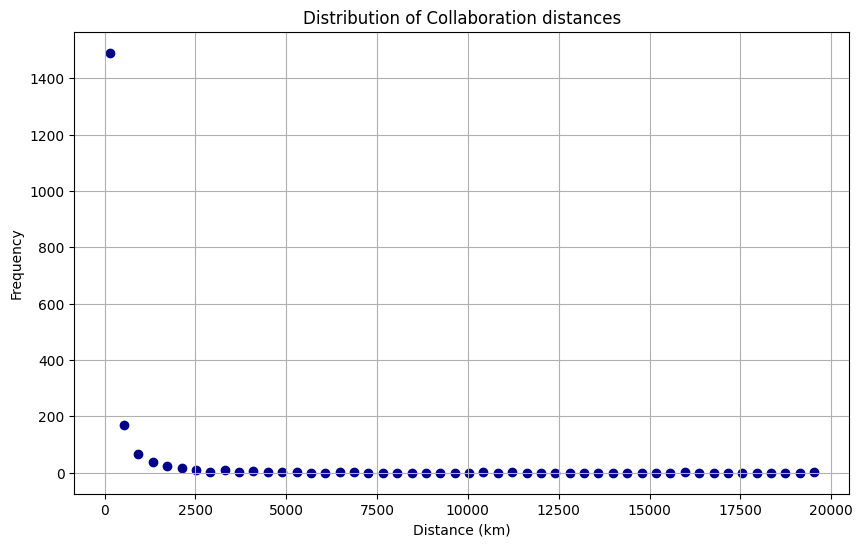

In [915]:
import numpy as np

def linear_binning(data, num_bins, range_min=None, range_max=None):
    """
    Perform linear binning on data.

    Parameters:
    - data (list or numpy array): The input data to be binned.
    - num_bins (int): The number of bins.
    - range_min (float, optional): Minimum value of the range. Defaults to min(data).
    - range_max (float, optional): Maximum value of the range. Defaults to max(data).

    Returns:
    - bin_edges (numpy array): The edges of the bins.
    - bin_counts (numpy array): The counts of data points in each bin.
    """
    # Determine the range for binning
    if range_min is None:
        range_min = min(data)
    if range_max is None:
        range_max = max(data)
    
    # Create bins with equal spacing
    bin_edges = np.linspace(range_min, range_max, num_bins + 1)
    
    # Count data points in each bin
    bin_counts, _ = np.histogram(data, bins=bin_edges)
    
    return bin_edges, bin_counts

# Perform linear binning on the distances
num_bins = 50
bin_edges, bin_counts = linear_binning(list(dist_freq.keys()), num_bins)
bin_edges_y, bin_counts_y = linear_binning(list(dist_freq.values()), num_bins)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.scatter(bin_edges[:-1], bin_counts_y, color='darkblue')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Collaboration distances')
plt.grid(True)
# plt.ylim(0, 10)
# plt.savefig('plots/collaboration_distances.pdf')

Plot unique distances (null plot):

[0.0, 141.00234476581852, 168.61306242664077, 171.64464166040565, 181.36289830786902, 206.25635858407855, 226.7383193914462, 254.32293365970563, 265.47354595381364, 269.4922486448785, 271.57618864001955, 278.07096715612255, 324.29902462690063, 330.47351567612446, 340.7188075983415, 343.18223845471334, 358.3993238997833, 364.160432206329, 366.25681968993354, 370.4307930802441, 380.718857499427, 381.9156853930866, 385.9004654597518, 391.19648342645627, 400.6278599387461, 407.747539990462, 414.0465877653381, 415.76091452309896, 417.22228693511676, 421.09494346206964, 427.61422419252676, 427.74702304900916, 452.0518791380836, 452.21960698525345, 456.81983936247013, 463.3111766614302, 475.7269957146351, 476.5873937397337, 498.6251247461707, 501.37715702308424, 504.6817351025904, 504.98391353571606, 509.0553666979794, 522.6398431888457, 531.9401685131689, 539.34226792783, 543.0044557973595, 552.1979668358534, 556.1512653373444, 561.8999981641359, 589.7459817029683, 591.8404106582036, 597.754

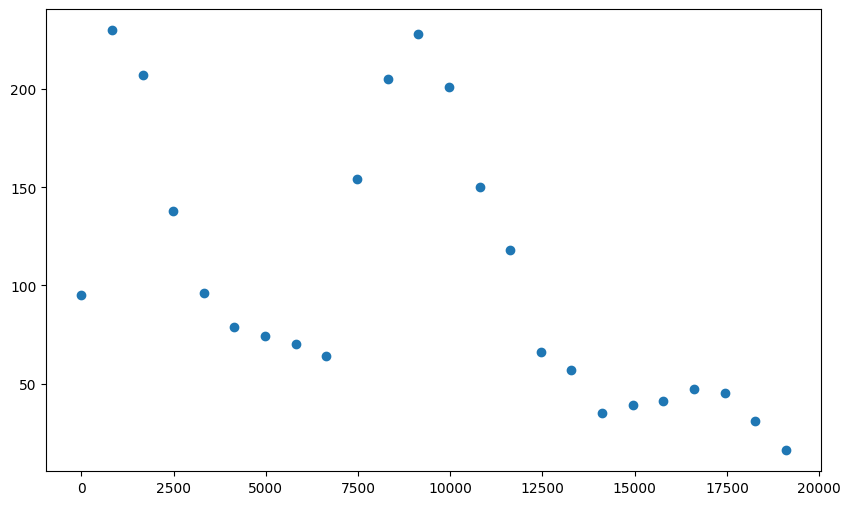

In [878]:
unique_distances = list(set(distance_dict.values()))
unique_distances.sort()
print(unique_distances)

# Perform linear binning on the distances
num_bins = 24
bin_edges, bin_counts = linear_binning(unique_distances, num_bins)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.scatter(bin_edges[:-1], bin_counts)

In [913]:
len(list(nx.connected_components(G_countries)))

1495

### World Map with Collaborations Visualized:

In [695]:
# create a dictionary for artists and their country centroids
artist_country_centroids = {}
for i in range(len(nodes_df_filtered)):
    name = nodes_df_filtered.iloc[i]['name']
    country = nodes_df_filtered.loc[nodes_df_filtered['name'] == name, 'country'].values[0]
    centroid = centroid_dict[country]
    artist_country_centroids[name] = centroid

print(artist_country_centroids)

{'Byklubben': (15.348346562226208, 68.75015572054915), 'Kontra K': (10.385780507966935, 51.10698180746323), 'Maxim': (10.385780507966935, 51.10698180746323), 'Christopher Martin': (14.126476099637841, 47.58549439203598), 'Jakob Hellman': (16.74558048694412, 62.779665193105906), 'Madh': (12.07001254768979, 42.79662848728706), 'Juice': (16.74558048694412, 62.779665193105906), 'Nehuda': (-2.7617294451886463, 42.173440110723924), 'VovaZiLvova': (31.252911064592077, 49.158673120411656), 'Nata Record': (-70.50568896121294, 18.894330823339565), 'Yomi': (15.348346562226208, 68.75015572054915), 'Kauniit & Uhkarohkeat': (26.27466560416192, 64.49884603487043), 'Danny Elfman': (19.390128349323042, 52.12759564417362), 'Attractions': (138.03089557691771, 37.59230135301572), 'MaRina': (19.390128349323042, 52.12759564417362), 'Rockwell': (-112.46167369956652, 45.67954720255075), 'Cosmos Insania': (-86.61516609633496, 14.826881651917772), 'Pálmi Gunnarsson': (-18.573961670805186, 64.99575386067318), 'G

In [775]:
# construct a graph from nodes_df_filtered and edges_df
nodes = nodes_df_filtered['name'].values
 
# get the subgraph of the nodes
G_vis = G_lcc.subgraph(nodes).copy()
print(G_vis.number_of_nodes(), G_vis.number_of_edges())

15353 74998


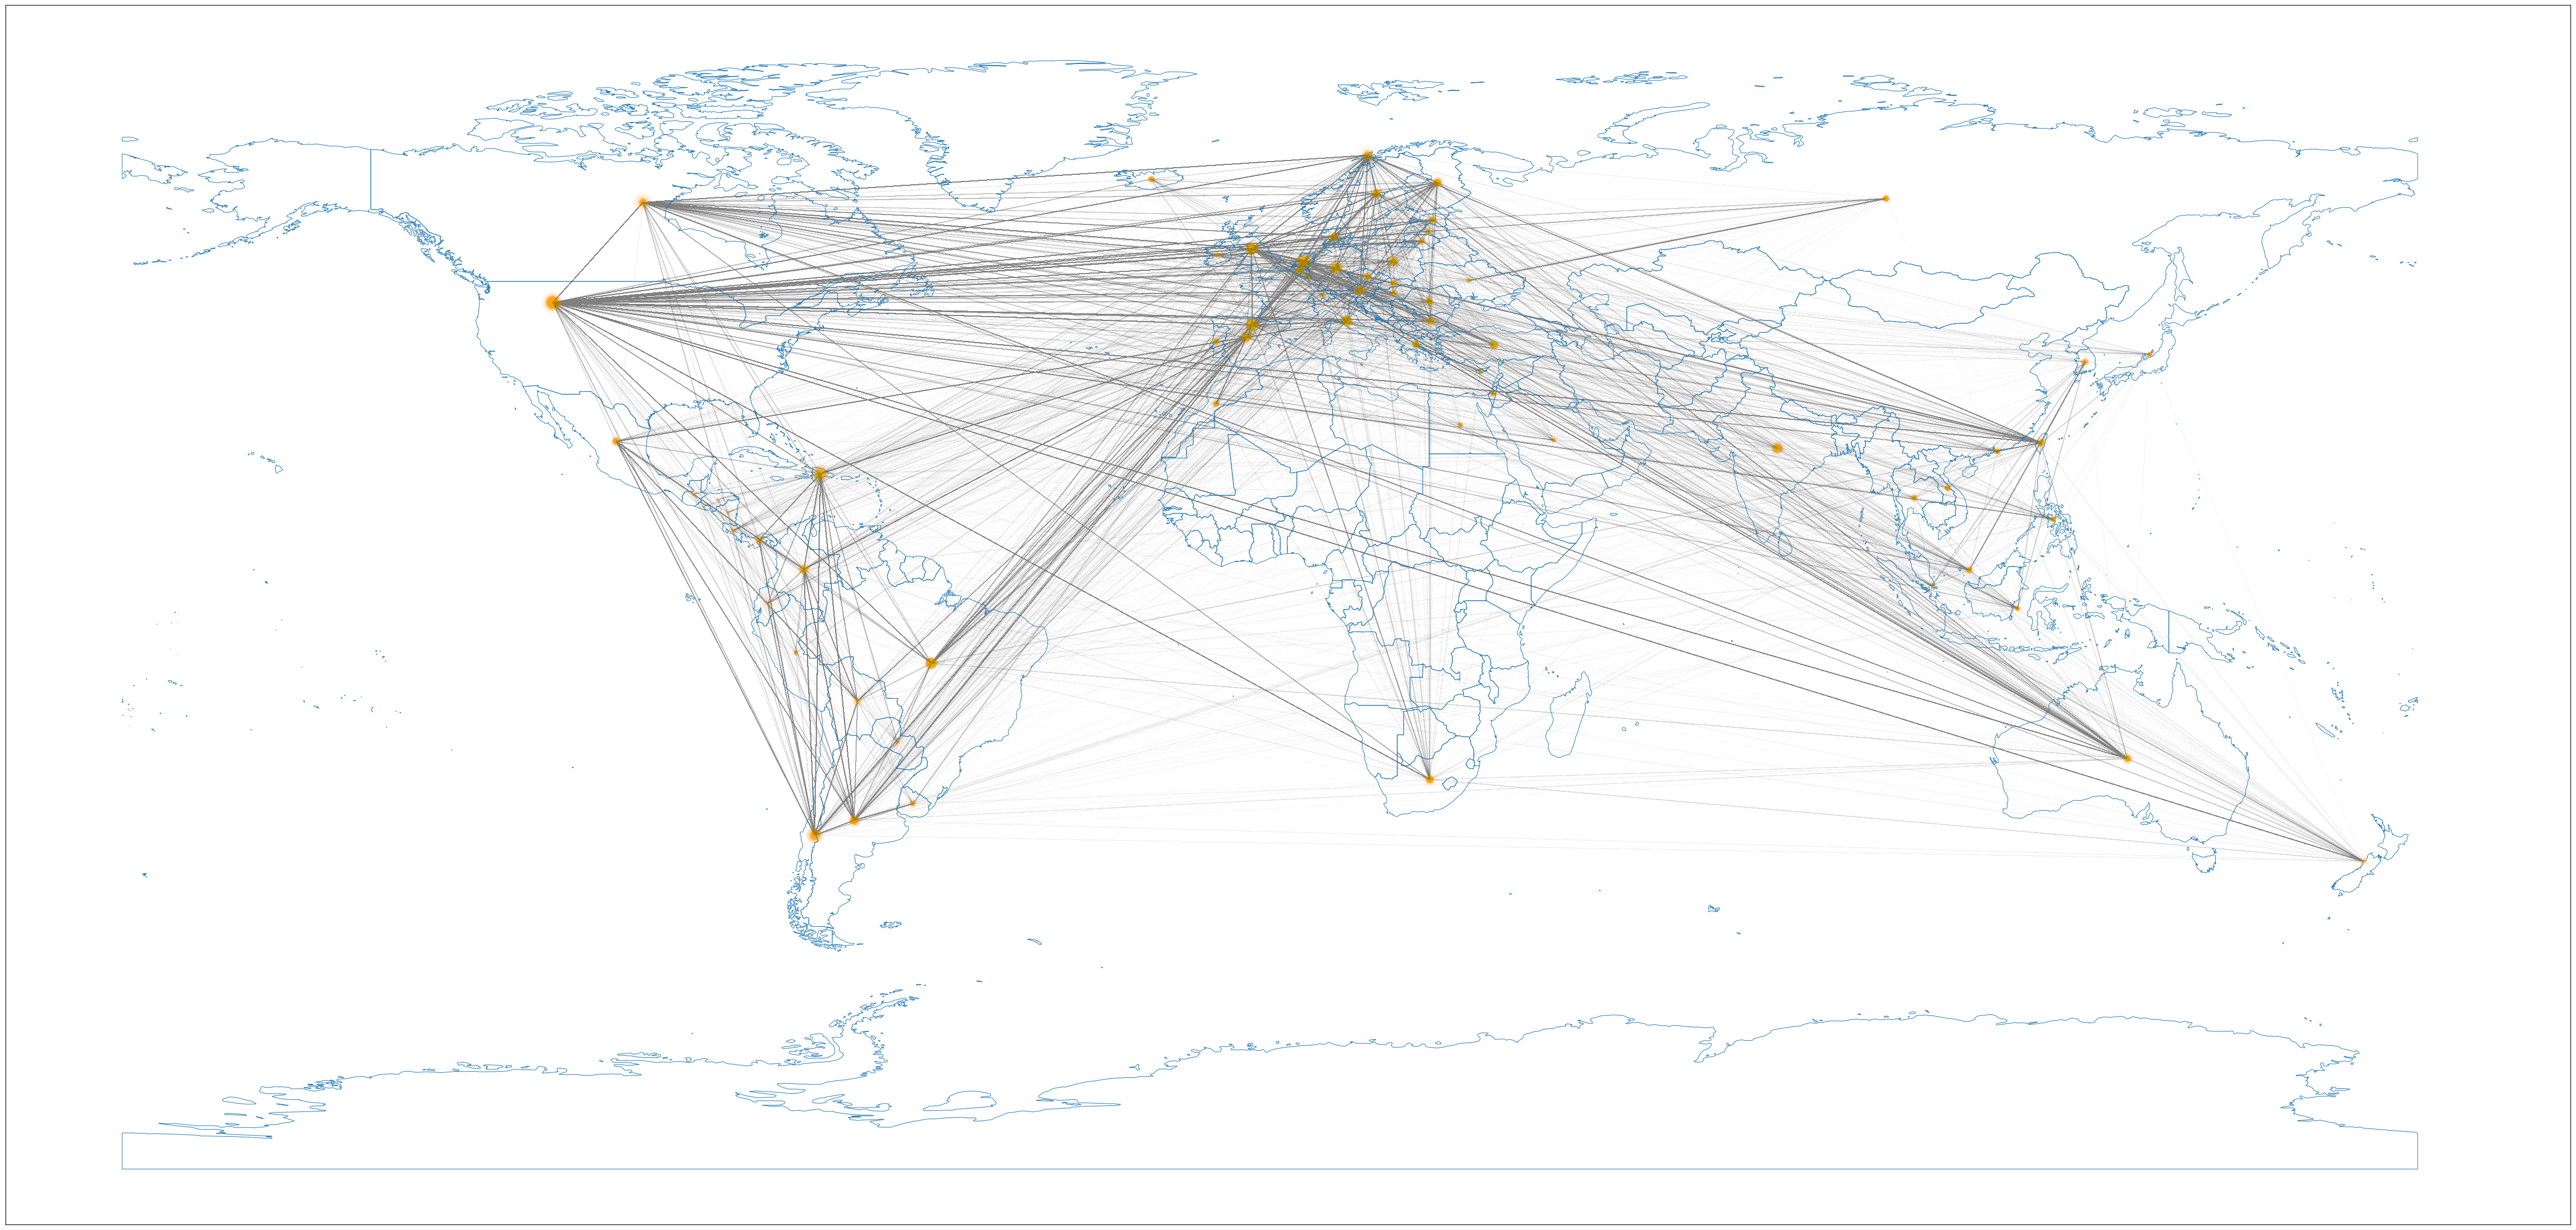

In [776]:
# draw the world map with the artists and coordinates
world.boundary.plot(figsize=(60, 30), linewidth=0.7)

# plot the collaboration network on top of the world map
nx.draw_networkx(G_vis, pos=artist_country_centroids, with_labels=False, node_size=[v * 4 for v in dict(G_vis.degree).values()], node_color='orange', alpha=0.01, edge_color = 'gray')
# plt.savefig('plots/collaborations_world_map.png', bbox_inches="tight", dpi = 300)
plt.show()

### Correlation with charting in other countries:

In [465]:
# REMOVE ROWS WITH ONLY ONE ELEMENT IN THE CHART HITS COLUMN
nodes_df = nodes_df[nodes_df['chart_hits'].apply(lambda x: len(x) > 1)]

print(len(nodes_df))

5047


construct a matrix $C$ such that $C_{ij}$ is how many times the country $i$ charted in $j$ and vice versa (from nodes_df). (Notice $C_{ij} \neq C_{ji}$)<br>
we also define the mutual charting matrix $\tilde{C}_{ij} = C_{ij} + C_{ji}$, (Notice $\tilde{C}_{ij}=\tilde{C}_{ji}$) <br>
and matrix $D$ such that $D_{ij}$ is the number of times the two countries collaborated (from G_collaborations) (Notice $D_{ij} = D_{ji}$).

In [508]:
# CONSTRUCTING THE C MATRIX
unique_countries = sorted(nodes_df['country'].unique())
C = np.zeros((len(unique_countries), len(unique_countries)))
for idx, row in nodes_df.iterrows():
    country = row['country']
    country_idx = unique_countries.index(country)
    hits = row['chart_hits']
    parsed_hits = [(item.split(' ')[0], int(item.split('(')[-1][:-1])) for item in hits]
    # print(parsed_hits)
    for hit in parsed_hits:
        chart_country = country_dict[hit[0]]
        if country == chart_country: # skip the same country
            continue
        if chart_country in unique_countries: # ignore countries not in the list
            chart_country_idx = unique_countries.index(chart_country)
            C[country_idx, chart_country_idx] += hit[1]
print(C)

[[0.000e+00 3.000e+00 7.000e+00 ... 1.000e+01 7.660e+02 1.000e+00]
 [1.400e+01 0.000e+00 9.100e+01 ... 1.020e+02 1.800e+01 1.400e+01]
 [1.700e+01 2.700e+01 0.000e+00 ... 1.500e+01 1.600e+01 1.000e+00]
 ...
 [2.390e+02 1.601e+03 9.860e+02 ... 0.000e+00 2.500e+02 3.890e+02]
 [2.130e+02 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [3.100e+01 3.200e+01 3.100e+01 ... 5.600e+01 3.200e+01 0.000e+00]]


In [522]:
C_tilde = C + C.T
print(C_tilde)

[[   0.   17.   24. ...  249.  979.   32.]
 [  17.    0.  118. ... 1703.   18.   46.]
 [  24.  118.    0. ... 1001.   16.   32.]
 ...
 [ 249. 1703. 1001. ...    0.  250.  445.]
 [ 979.   18.   16. ...  250.    0.   32.]
 [  32.   46.   32. ...  445.   32.    0.]]


In [ ]:
# CONTRSTRUCTING THE D MATRIX
D = np.zeros((len(unique_countries), len(unique_countries)))
for edge in list(G_lcc.edges()):
    source = edge[0]
    target = edge[1]
    if source not in nodes_df['name'].values or target not in nodes_df['name'].values:
        continue
    source_country = nodes_df.loc[nodes_df['name'] == source, 'country'].values[0]
    target_country = nodes_df.loc[nodes_df['name'] == target, 'country'].values[0]
    source_idx = unique_countries.index(source_country)
    target_idx = unique_countries.index(target_country)
    D[source_idx, target_idx] += 1

print(D)

[[4.640e+02 2.000e+00 8.000e+00 ... 1.400e+01 7.900e+01 1.000e+00]
 [8.000e+00 8.500e+01 2.500e+01 ... 7.600e+01 1.000e+00 0.000e+00]
 [8.000e+00 2.000e+01 1.790e+02 ... 3.200e+01 0.000e+00 0.000e+00]
 ...
 [2.300e+01 1.320e+02 6.300e+01 ... 2.254e+03 0.000e+00 4.000e+00]
 [6.300e+01 0.000e+00 0.000e+00 ... 0.000e+00 5.300e+01 0.000e+00]
 [0.000e+00 0.000e+00 1.000e+00 ... 4.000e+00 0.000e+00 0.000e+00]]


In [531]:
# finding the correlation between the matrices C_tilde and D
C_tilde_flat = C_tilde.flatten()
D_flat = D.flatten()

correlation, p_value = pearsonr(C_tilde_flat, D_flat)
print(f"Pearson Correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4e}")

Pearson Correlation: 0.2033
P-value: 7.2391e-47


### Correlation with Popularity:

We calculate the assortativity coefficient for the popularity_score node attribute.

Assortativity for the small collaboration network:

In [604]:
# CREATE A DICTIONARY OF POPULARITY
popularity_dict = dict(zip(nodes_df_filtered_pop['name'], nodes_df_filtered_pop['popularity']))

# Add the popularity as a node attribute to the collaboration network
nx.set_node_attributes(G_collaborations_lcc, popularity_dict, 'popularity')

# remove the nodes with no popularity
G_colab_lcc_unfrozen = nx.Graph(G_collaborations_lcc)
for node in G_collaborations_lcc.nodes():
    if node not in popularity_dict:
        G_colab_lcc_unfrozen.remove_node(node)

# calculate assortativity coefficient for popularity
popularity_assortativity = nx.attribute_assortativity_coefficient(G_colab_lcc_unfrozen, 'popularity')
print(f"Popularity assortativity: {popularity_assortativity}")

Popularity assortativity: 0.01023697021502182


Assortativity on the whole graph:

In [615]:
# CREATE A DICTIONARY OF POPULARITY
popularity_dict = dict(zip(nodes_df_filtered_pop['name'], nodes_df_filtered_pop['popularity']))

# Add the popularity as a node attribute to the collaboration network
nx.set_node_attributes(G_lcc, popularity_dict, 'popularity')

# remove the nodes with no popularity
G_lcc_unfrozen = nx.Graph(G_lcc)
for node in G_lcc.nodes():
    if node not in popularity_dict:
        G_lcc_unfrozen.remove_node(node)

# calculate assortativity coefficient for popularity
popularity_assortativity = nx.attribute_assortativity_coefficient(G_lcc_unfrozen, 'popularity')
print(f"Popularity assortativity: {popularity_assortativity}")

Popularity assortativity: 0.001343366274771524


In [710]:
print(len(nodes_df_filtered))

19640
